# Multivariate Analysis :- 


In Multivariate analysis , first we perform "Bivariate Analysis" then perform "Multivariate Analysis"

- Ideally we should do analysis of every column with other column but practically it is not possible. In my project I have 23 columns so if I do bivariate analysis upon 23 column then I have to do bivariate analysis for this much column which is too much. So better way is the column we found important for analysis can do bivariate analysis upon them.
- Focus on "target column" and understand variation of target column with other column.
- Second based on feature importance can find interaction between two feature.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
print(pd.__version__)

2.2.0


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [5]:
df.head()

property_type                   society      sector  price  price_per_sqft  \
0          flat   la vida by tata housing  sector 113   3.05         15561.0   
1          flat             m3m woodshire  sector 107   0.88          6442.0   
2         house         vatika india next   sector 82   7.00        194444.0   
3         house               independent   sector 12   1.40          8702.0   
4          flat  maxworth city residences  sector 10a   0.90          7083.0   

     area                                       areaWithType  bedRoom  \
0  1960.0  Super Built up area 2690(249.91 sq.m.)Built Up...        3   
1  1366.0             Super Built up area 1366(126.91 sq.m.)        2   
2   360.0  Plot area 360(33.45 sq.m.)Built Up area: 3900 ...        4   
3  1609.0                         Plot area 166(138.8 sq.m.)        2   
4  1271.0             Super Built up area 1200(111.48 sq.m.)        2   

   bathroom balcony  floorNum      facing   agePossession  \
0         4       3       3.0  North-West  Relatively New   
1         2      3+       3.0        East  Relatively New   
2         4      3+       3.0  North-East  Relatively New   
3         2       1       2.0  North-East    Old Property   
4         2       3       9.0        East    New Property   

   super_built_up_area  built_up_area  carpet_area  study room  servant room  \
0               2690.0         2150.0       1960.0           0             1   
1               1366.0            NaN          NaN           0             0   
2                  NaN         3900.0       3743.0           0             1   
3                  NaN          166.0          NaN           0             0   
4               1200.0            NaN          NaN           0             0   

   store room  pooja room  others  furnishing_type  luxury_score  
0           0           0       0                0           174  
1           0           0       0                0            99  
2           0           0       0                1           105  
3           0           0       0                0             0  
4           0           0       1                0            52

### property_type vs price

/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


<Axes: xlabel='property_type', ylabel='price'>

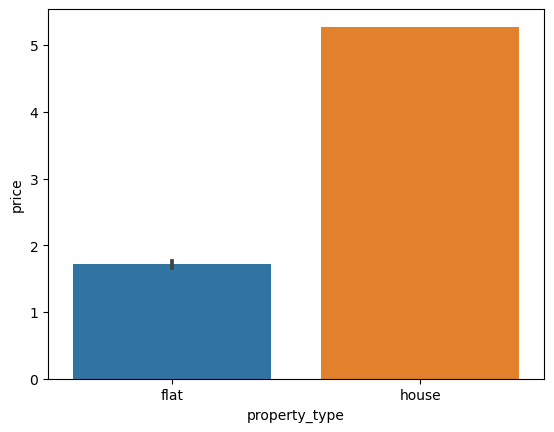

In [10]:
sns.barplot(x=df['property_type'], y=df['price'], estimator=np.mean)

<Axes: xlabel='property_type', ylabel='price'>

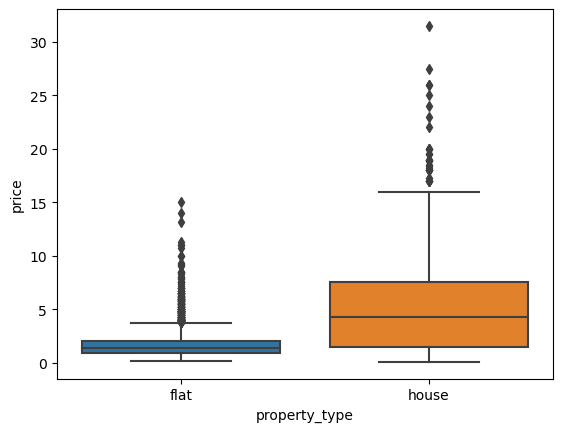

In [9]:
sns.boxplot(x=df['property_type'], y=df['price'])

- On an average "Houses" in data is approx 4cr. And "flats" price is around 1.5 cr
- Boxplot explain houses range is bigger  ( 0 to 15 Plus crore) , flats is between 0 to 5 cr range


### property_type vs area

/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


<Axes: xlabel='property_type', ylabel='built_up_area'>

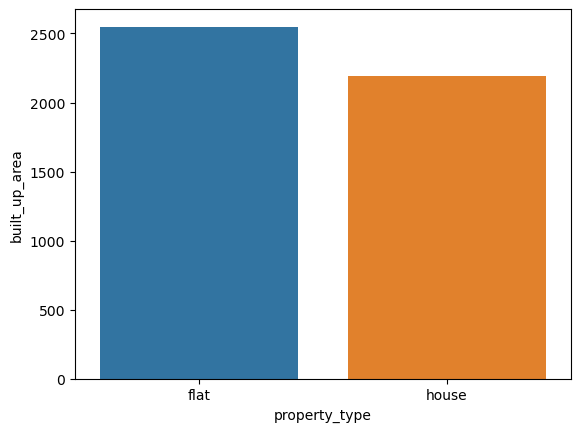

In [12]:
sns.barplot(x=df['property_type'], y=df['built_up_area'], estimator=np.mean)

<Axes: xlabel='property_type', ylabel='built_up_area'>

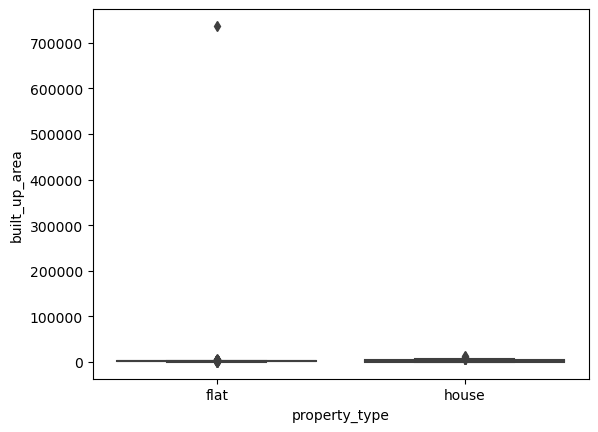

In [13]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

In [14]:
# removing that crazy outlier
df = df[df['built_up_area'] != 737147]

<Axes: xlabel='property_type', ylabel='built_up_area'>

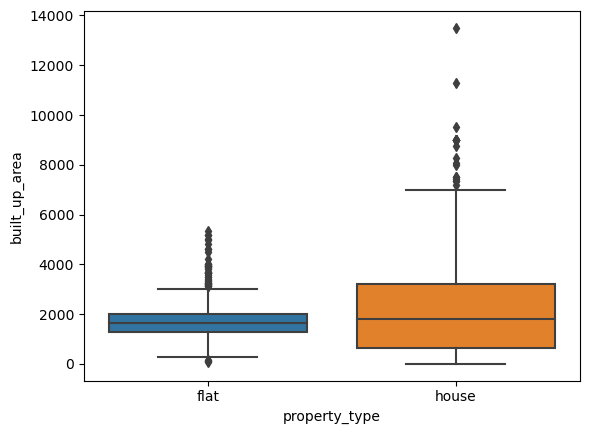

In [15]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

 - Houses area in comparison to flat is bigger which is practically correct as house size is always bigger than flats size.
- Boxplot does not give clear picture due to "outliers", so remove the particular  outlier and then can see in boxplot also house range is bigger compare to flats. 


### property_type vs price_per_sqft

/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


<Axes: xlabel='property_type', ylabel='price_per_sqft'>

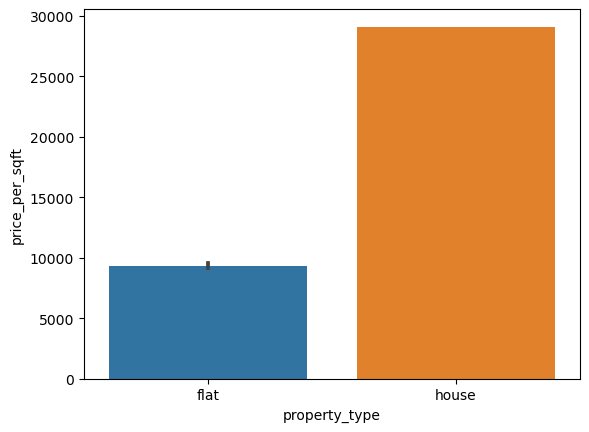

In [17]:
sns.barplot(x=df['property_type'], y=df['price_per_sqft'], estimator=np.mean)

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

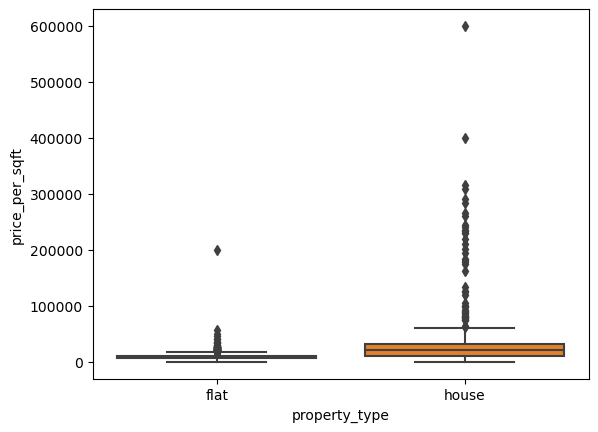

In [18]:
sns.boxplot(x=df['property_type'], y=df['price_per_sqft'])

In [19]:
# check outliers
df[df['price_per_sqft'] > 100000][['property_type','society','sector','price','price_per_sqft','area','areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']]

property_type                      society     sector  price  \
2            house            vatika india next  sector 82   7.00   
80           house     unitech uniworld resorts  sector 33   9.50   
169           flat           ambience caitriona  sector 24  14.00   
595          house                  independent  sector 12   3.50   
657          house       unitech deerwood chase  sector 50   8.45   
686          house                  independent   sector 4   0.60   
689          house               uppal southend  sector 49   6.75   
888          house       dlf city plots phase 2  sector 25  10.50   
911          house                  independent  sector 38   8.00   
1030         house  unitech nirvana birch court  sector 50   7.10   
1208         house         eros rosewood villas  sector 49   2.75   
1327         house                    rk excelo  sector 12   0.60   
1646         house                dlf the grove  sector 54   5.70   
1731         house          huda plot sector 38  sector 38   4.30   
1973         house                  independent  sector 24  10.00   
2064         house                  independent  sector 12   6.00   
2066         house     unitech uniworld resorts  sector 33  10.00   
2067         house           vipul tatvam villa  sector 48   7.25   
2250         house                  independent  sector 28   4.50   
2476         house       dlf city plots phase 2  sector 25  10.00   
2750         house                  independent  sector 55   1.45   
2837         house                  independent  sector 17   3.50   
2892         house                  independent  sector 57   8.00   
3156         house                        ansal  sector 43   1.85   
3439         house       emaar the palm springs  sector 54  24.00   
3453         house                  independent  sector 54   3.75   
3578         house                  independent  sector 23   2.80   
3641         house         bhim nagar, sector 6   sector 6   0.85   
3682         house                   ardee city  sector 52   5.50   

      price_per_sqft   area  \
2           194444.0  360.0   
80          173992.0  546.0   
169         200000.0  700.0   
595         133079.0  263.0   
657         235376.0  359.0   
686         105263.0   57.0   
689         290948.0  232.0   
888         261194.0  402.0   
911         230547.0  347.0   
1030        283333.0  251.0   
1208        178571.0  154.0   
1327        120000.0   50.0   
1646        211111.0  270.0   
1731        245398.0  175.0   
1973        229885.0  435.0   
2064        315789.0  190.0   
2066        181818.0  550.0   
2067        201388.0  360.0   
2250        125000.0  360.0   
2476        400000.0  250.0   
2750        241666.0   60.0   
2837        218750.0  160.0   
2892        266666.0  300.0   
3156        308333.0   60.0   
3439        600000.0  400.0   
3453        234375.0  160.0   
3578        161849.0  173.0   
3641        126865.0   67.0   
3682        183333.0  300.0   

                                           areaWithType  super_built_up_area  \
2     Plot area 360(33.45 sq.m.)Built Up area: 3900 ...                  NaN   
80                           Plot area 546(50.73 sq.m.)                  NaN   
169                    Built Up area: 700 (65.03 sq.m.)                  NaN   
595   Plot area 263(24.43 sq.m.)Built Up area: 4800 ...                  NaN   
657                          Plot area 359(33.35 sq.m.)                  NaN   
686                             Plot area 57(5.3 sq.m.)                  NaN   
689                          Plot area 232(21.55 sq.m.)                  NaN   
888                          Plot area 402(37.35 sq.m.)                  NaN   
911   Built Up area: 347 (32.24 sq.m.)Carpet area: 2...                  NaN   
1030                          Plot area 240(22.3 sq.m.)                  NaN   
1208  Plot area 154(14.31 sq.m.)Carpet area: 1650 sq...                  NaN   
1327  Plot area 50(4.65 sq.m.)Built Up area

- Houses on an average 20k sqft  and flat price per sqft approx 8000.
- In boxpot can see outliers value which need to be taken care.
- Checked thouroghlt and get it is data error not outliers.


<Axes: xlabel='bedRoom', ylabel='property_type'>

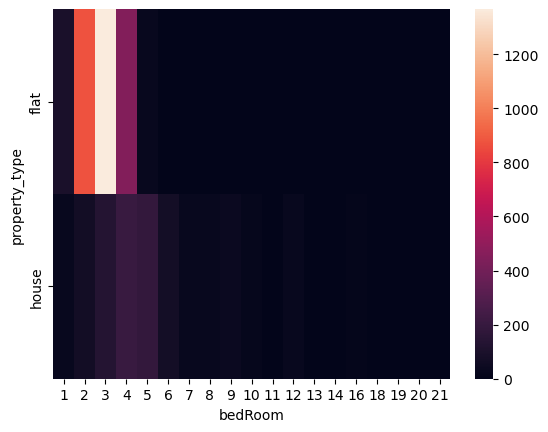

In [20]:
sns.heatmap(pd.crosstab(df['property_type'],df['bedRoom']))

- Applied Heatmap and found in flats 2,3,4 bhk is common , In houses 4 or 5 bhk is common


In [21]:
# checking outliers
df[df['bedRoom'] >= 10]

property_type                      society     sector  price  \
23           house                  independent  sector 26   8.49   
58           house                  independent  sector 13   1.50   
109          house  independent house sector 45  sector 40   9.00   
160          house                  independent  sector 26  14.75   
234          house                  independent  sector 43   4.50   
...            ...                          ...        ...    ...   
3540         house                  independent  sector 25   9.00   
3545         house                  independent  sector 14   8.00   
3665         house                  independent  sector 43   2.10   
3681         house                     shivpuri   sector 7   2.80   
3687         house                  independent  sector 57   6.95   

      price_per_sqft    area  \
23           47167.0  1800.0   
58           11538.0  1300.0   
109          38022.0  2367.0   
160          51864.0  2844.0   
234          39062.0  1152.0   
...              ...     ...   
3540         28490.0  3159.0   
3545         17707.0  4518.0   
3665         38251.0   549.0   
3681         12444.0  2250.0   
3687         38611.0  1800.0   

                                           areaWithType  bedRoom  bathroom  \
23                          Plot area 200(167.23 sq.m.)       12        12   
58                         Plot area 1300(120.77 sq.m.)       10         7   
109   Plot area 2367(219.9 sq.m.)Built Up area: 9000...       12        12   
160                         Plot area 316(264.22 sq.m.)       16        20   
234                         Plot area 128(107.02 sq.m.)       20        20   
...                                                 ...      ...       ...   
3540                        Plot area 351(293.48 sq.m.)       10        10   
3545                        Plot area 502(419.74 sq.m.)       12         4   
3665                             Plot area 61(51 sq.m.)       10        10   
3681                       Plot area 2250(209.03 sq.m.)       10         7   
3687                        Plot area 192(160.54 sq.m.)       12        12   

     balcony  floorNum      facing   agePossession  super_built_up_area  \
23        3+       4.0       North  Relatively New                  NaN   
58         3       4.0        East  Moderately Old                  NaN   
109        3       4.0  North-West    New Property                  NaN   
160       3+       4.0        East    New Property                  NaN   
234       3+       4.0        East  Relatively New                  NaN   
...      ...       ...         ...             ...                  ...   
3540       3       3.0        East    Old Property                  NaN   
3545      3+       3.0       North    Old Property                  NaN   
3665      3+       5.0        West    New Property                  NaN   
3681       3       1.0         NaN    Old Property                  NaN   
3687      3+       4.0        East    New Property                  NaN   

      built_up_area  carpet_area  study room  servant room  store room  \
23           1800.0          NaN           0             1           0   
58           1300.0          NaN           0             0           0   
109          9000.0       6000.0           0             1           0   
160          2844.0          NaN           1             1           1   
234          1152.0          NaN           0             1           0   
...             ...          ...         ...           ...         ...   
3540         3159.0          NaN           0             0           0   
3545         4518.0          NaN           0             1           1   
3665          549.0          NaN           0             1           0   
3681         2250.0          NaN           1             1           0   
3687         1728.0          NaN           0             1           1   

      pooja room  others  furnishing_type  luxury_score  
23    

- Again checked where bedroom is more than 10 in number so found here also some data error as example for 18 bedroom area given 1400 sqft which is not possible in real.


<Axes: xlabel='property_type', ylabel='floorNum'>

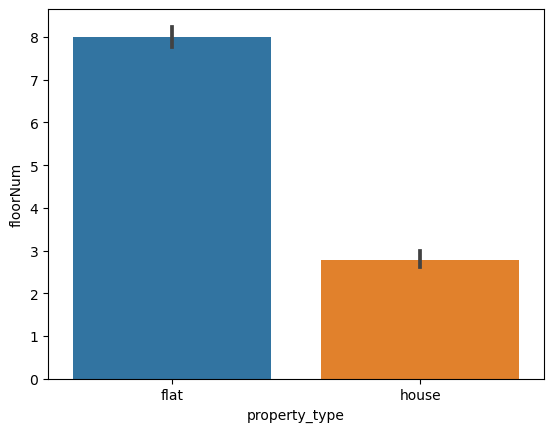

In [22]:
sns.barplot(x=df['property_type'],y=df['floorNum'])

- On an average flat around 8 th floor and houses around 3rd floor


<Axes: xlabel='property_type', ylabel='floorNum'>

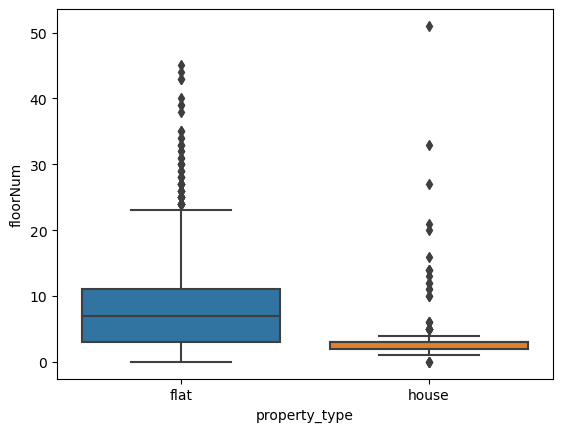

In [23]:
sns.boxplot(x=df['property_type'],y=df['floorNum'])


- In boxplot can see one house data shows approx 15th floor which could be penthouses or something in high rise building.



In [24]:
# checking for outliers
df[(df['property_type'] == 'house') & (df['floorNum'] > 10)]

property_type                  society      sector  price  \
343          house           ats tourmaline  sector 109   1.87   
574          house              greenopolis   sector 89   0.70   
1037         house      ireo victory valley   sector 67   8.00   
1061         house      satya the hermitage  sector 103   3.15   
1325         house   vatika the seven lamps   sector 82   1.60   
1375         house              independent   sector 92   1.80   
1414         house         suncity township   sector 54   2.00   
2135         house              spaze privy   sector 72   3.10   
2184         house        suncity avenue 76   sector 76   0.75   
2206         house          godrej meridien  sector 106   5.60   
2608         house               ninex city   sector 76   1.75   
3103         house           dlf the arbour   sector 63   8.50   
3564         house              spaze privy   sector 72   3.09   
3717         house  indiabulls centrum park  sector 103   3.25   

      price_per_sqft    area  \
343           8697.0  2150.0   
574           5397.0  1297.0   
1037         22222.0  3600.0   
1061          6702.0  4700.0   
1325          6597.0  2425.0   
1375          7627.0  2360.0   
1414         30968.0   646.0   
2135          8486.0  3653.0   
2184         10067.0   745.0   
2206         14000.0  4000.0   
2608          6250.0  2800.0   
3103         21519.0  3950.0   
3564          6981.0  4426.0   
3717          8125.0  4000.0   

                                           areaWithType  bedRoom  bathroom  \
343                  Built Up area: 2150 (199.74 sq.m.)        3         4   
574                   Built Up area: 1297 (120.5 sq.m.)        2         2   
1037                        Plot area 400(334.45 sq.m.)        6         7   
1061                 Built Up area: 4700 (436.64 sq.m.)        4         5   
1325                       Plot area 2425(225.29 sq.m.)        4         4   
1375                 Built Up area: 2360 (219.25 sq.m.)        4         5   
1414  Plot area 60Built Up area: 60 sq.m.Carpet area...        9         9   
2135                       Plot area 3653(339.37 sq.m.)        5         5   
2184  Plot area 745(69.21 sq.m.)Built Up area: 745 s...        2         2   
2206                       Plot area 4000(371.61 sq.m.)        5         4   
2608                   Carpet area: 2800 (260.13 sq.m.)        4         4   
3103                 Built Up area: 3950 (366.97 sq.m.)        4         4   
3564  Built Up area: 3653 (339.37 sq.m.)Carpet area:...        5         5   
3717                       Plot area 4000(371.61 sq.m.)        4         3   

     balcony  floorNum      facing       agePossession  super_built_up_area  \
343        0      12.0         NaN           Undefined                  NaN   
574        2      14.0  North-East           Undefined                  NaN   
1037      3+      51.0  North-East      Moderately Old                  NaN   
1061       0      12.0        East           Undefined                  NaN   
1325      3+      16.0       North      Moderately Old                  NaN   
1375       0      13.0         NaN           Undefined                  NaN   
1414       3      11.0       North      Relatively New                  NaN   
2135      3+      21.0         NaN      Relatively New                  NaN   
2184       2      11.0  North-East        New Property                  NaN   
2206      3+      33.0  North-East        New Property                  NaN   
2608       0      14.0         NaN           Undefined                  NaN   
3103      3+      27.0         NaN           Undefined                  NaN   
3564      3+      14.0        East      Relatively New                  NaN   
3717      3+      20.0         NaN  Under Construction                  NaN   

      built_up_area  carpet_area  study room  servant room  store room  \
343          2150.0          NaN           0             0           0   
574          1297.0         

- Again checked where bedroom is more than 10 in number so found here also some data error as example for 18 bedroom area given 1400 sqft which is not possible in real.



# conclusion houses(villa) but in appartments

In [25]:
df.head()

property_type                   society      sector  price  price_per_sqft  \
0          flat   la vida by tata housing  sector 113   3.05         15561.0   
1          flat             m3m woodshire  sector 107   0.88          6442.0   
2         house         vatika india next   sector 82   7.00        194444.0   
3         house               independent   sector 12   1.40          8702.0   
4          flat  maxworth city residences  sector 10a   0.90          7083.0   

     area                                       areaWithType  bedRoom  \
0  1960.0  Super Built up area 2690(249.91 sq.m.)Built Up...        3   
1  1366.0             Super Built up area 1366(126.91 sq.m.)        2   
2   360.0  Plot area 360(33.45 sq.m.)Built Up area: 3900 ...        4   
3  1609.0                         Plot area 166(138.8 sq.m.)        2   
4  1271.0             Super Built up area 1200(111.48 sq.m.)        2   

   bathroom balcony  floorNum      facing   agePossession  \
0         4       3       3.0  North-West  Relatively New   
1         2      3+       3.0        East  Relatively New   
2         4      3+       3.0  North-East  Relatively New   
3         2       1       2.0  North-East    Old Property   
4         2       3       9.0        East    New Property   

   super_built_up_area  built_up_area  carpet_area  study room  servant room  \
0               2690.0         2150.0       1960.0           0             1   
1               1366.0            NaN          NaN           0             0   
2                  NaN         3900.0       3743.0           0             1   
3                  NaN          166.0          NaN           0             0   
4               1200.0            NaN          NaN           0             0   

   store room  pooja room  others  furnishing_type  luxury_score  
0           0           0       0                0           174  
1           0           0       0                0            99  
2           0           0       0                1           105  
3           0           0       0                0             0  
4           0           0       1                0            52

<Axes: xlabel='agePossession', ylabel='property_type'>

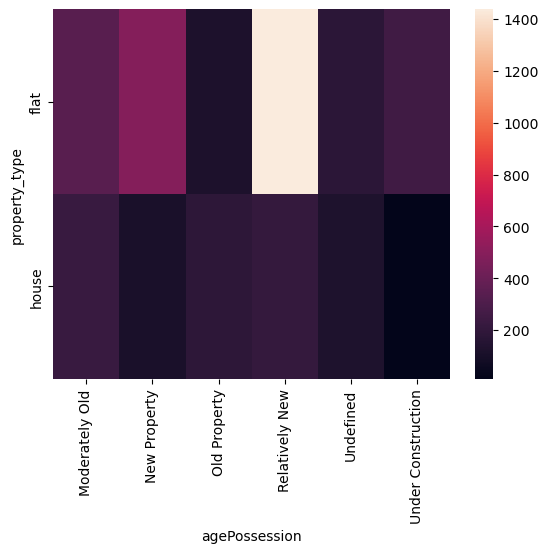

In [26]:
sns.heatmap(pd.crosstab(df['property_type'],df['agePossession']))

- In Heatmap can see relatively new property is mostly flats, in houses we have comparatively old property.
It means new construction is mostly going on for flats.

<Axes: xlabel='agePossession', ylabel='property_type'>

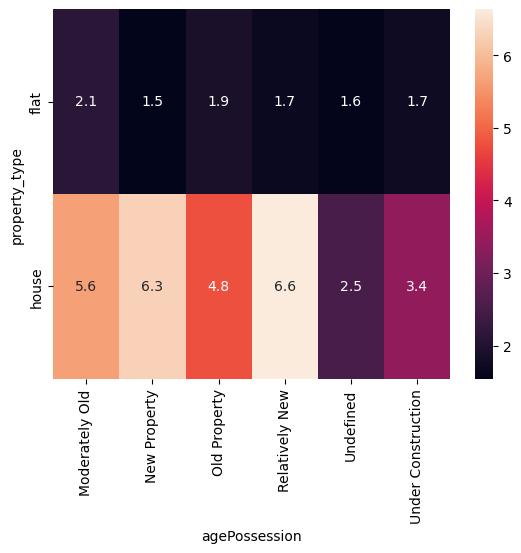

In [27]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='agePossession',values='price',aggfunc='mean'),annot=True)

- And when added price data in heatmap :-
- In house case price are higher and in flats price are between 2.1 to 1.6 based on construction type of flat.


<Axes: xlabel='bedRoom', ylabel='property_type'>

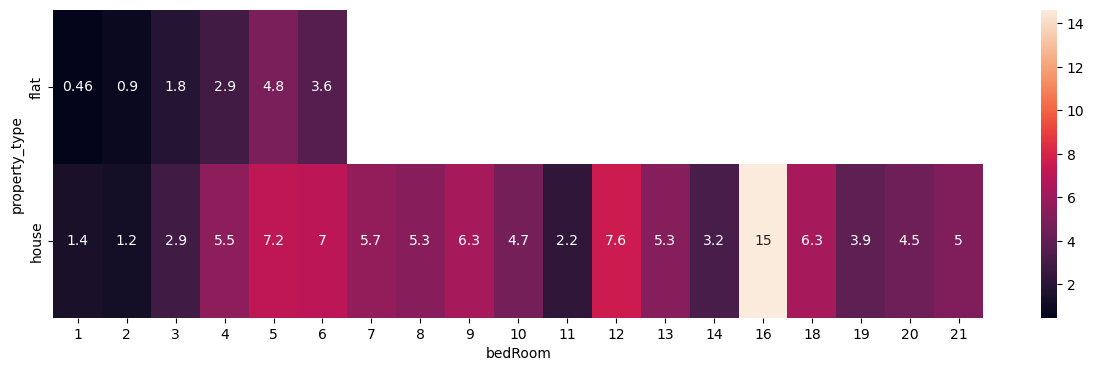

In [28]:
plt.figure(figsize=(15,4))
sns.heatmap(pd.pivot_table(df,index='property_type',columns='bedRoom',values='price',aggfunc='mean'),annot=True)

- As bedroom increase price increase


<Axes: xlabel='furnishing_type', ylabel='property_type'>

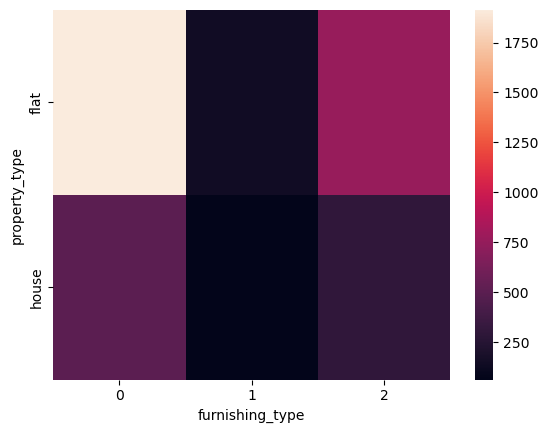

In [29]:
sns.heatmap(pd.crosstab(df['property_type'],df['furnishing_type']))

<Axes: xlabel='furnishing_type', ylabel='property_type'>

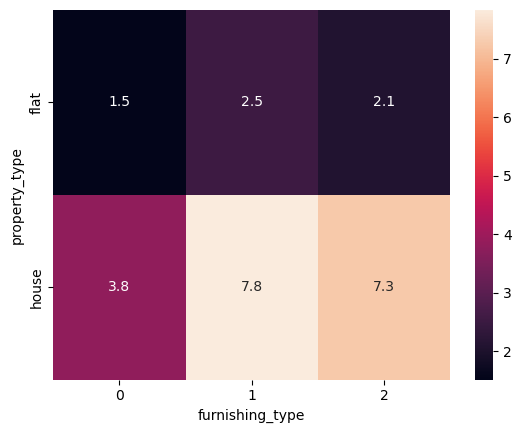

In [30]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='furnishing_type',values='price',aggfunc='mean'),annot=True)

<Axes: xlabel='property_type', ylabel='luxury_score'>

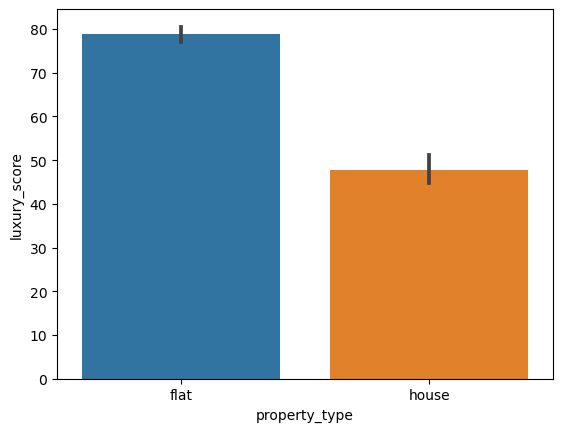

In [31]:
sns.barplot(x=df['property_type'],y=df['luxury_score'])

<Axes: xlabel='property_type', ylabel='luxury_score'>

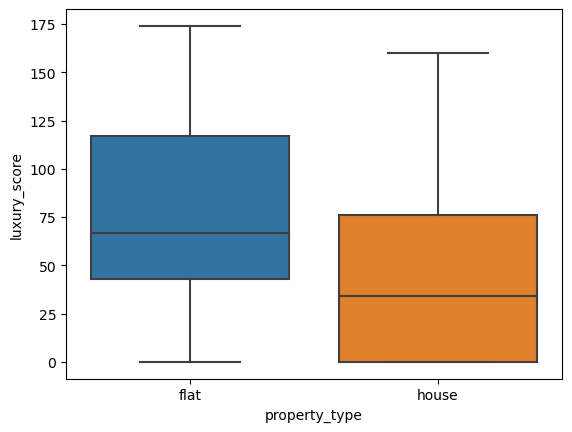

In [32]:
sns.boxplot(x=df['property_type'],y=df['luxury_score'])

In [33]:
df.head()

property_type                   society      sector  price  price_per_sqft  \
0          flat   la vida by tata housing  sector 113   3.05         15561.0   
1          flat             m3m woodshire  sector 107   0.88          6442.0   
2         house         vatika india next   sector 82   7.00        194444.0   
3         house               independent   sector 12   1.40          8702.0   
4          flat  maxworth city residences  sector 10a   0.90          7083.0   

     area                                       areaWithType  bedRoom  \
0  1960.0  Super Built up area 2690(249.91 sq.m.)Built Up...        3   
1  1366.0             Super Built up area 1366(126.91 sq.m.)        2   
2   360.0  Plot area 360(33.45 sq.m.)Built Up area: 3900 ...        4   
3  1609.0                         Plot area 166(138.8 sq.m.)        2   
4  1271.0             Super Built up area 1200(111.48 sq.m.)        2   

   bathroom balcony  floorNum      facing   agePossession  \
0         4       3       3.0  North-West  Relatively New   
1         2      3+       3.0        East  Relatively New   
2         4      3+       3.0  North-East  Relatively New   
3         2       1       2.0  North-East    Old Property   
4         2       3       9.0        East    New Property   

   super_built_up_area  built_up_area  carpet_area  study room  servant room  \
0               2690.0         2150.0       1960.0           0             1   
1               1366.0            NaN          NaN           0             0   
2                  NaN         3900.0       3743.0           0             1   
3                  NaN          166.0          NaN           0             0   
4               1200.0            NaN          NaN           0             0   

   store room  pooja room  others  furnishing_type  luxury_score  
0           0           0       0                0           174  
1           0           0       0                0            99  
2           0           0       0                1           105  
3           0           0       0                0             0  
4           0           0       1                0            52

<Axes: xlabel='sector', ylabel='property_type'>

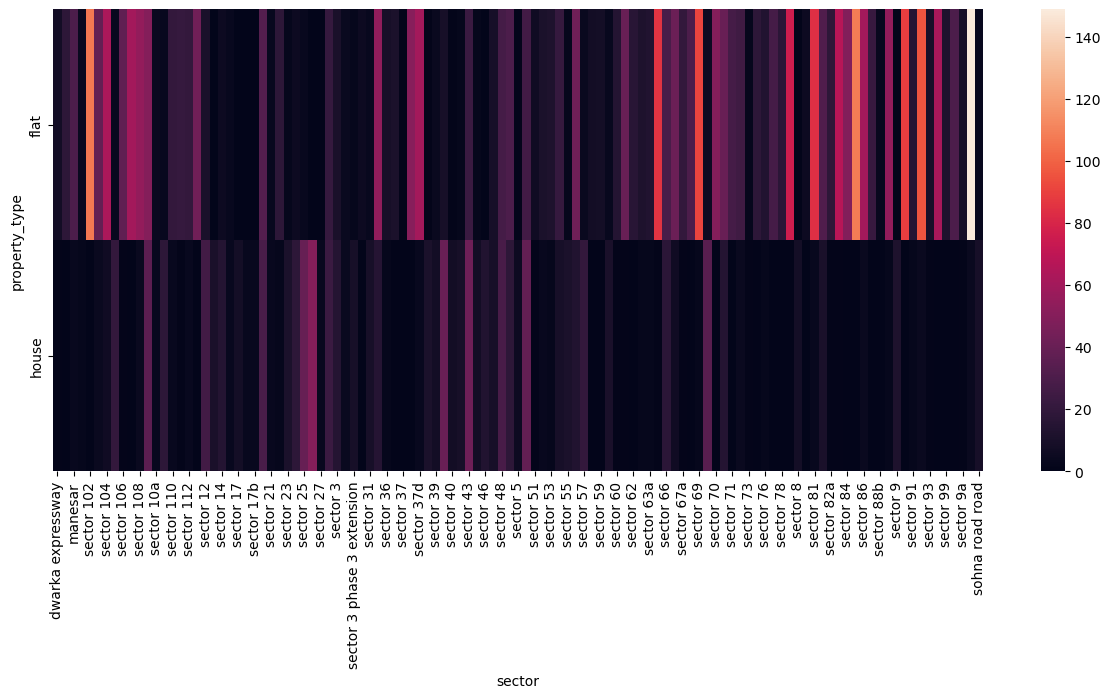

In [34]:
# sector analysis
plt.figure(figsize=(15,6))
sns.heatmap(pd.crosstab(df['property_type'],df['sector'].sort_index()))

- Applied heatmap to see in which sector flats is maximum, in new sectors of Gurgaon  (above 70 number sector known as new sector in Gurgaon) have more flats, whereas in old sector ( 1 to 60 sector) houses are more. 



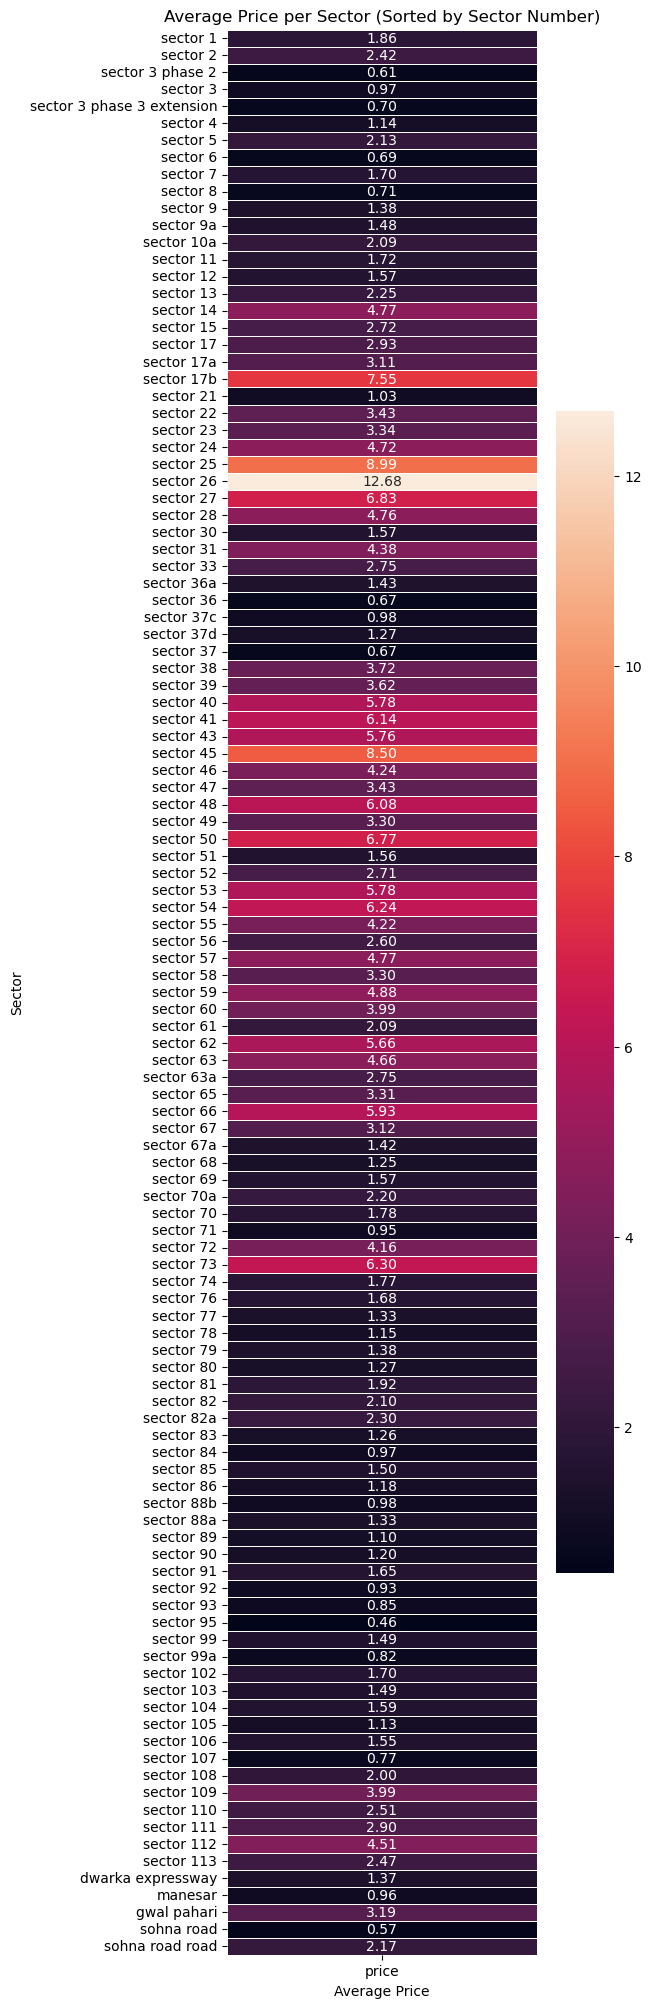

In [35]:
# sector analysis
import re
# Group by 'sector' and calculate the average price
avg_price_per_sector = df.groupby('sector')['price'].mean().reset_index()

# Function to extract sector numbers
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return a large number for non-numbered sectors

avg_price_per_sector['sector_number'] = avg_price_per_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()


- Some sectors like 25,26, 27 sector is DLF owned sector which is highest in all. So properties are really costly in these sector.
- 1 to 10 sector know as 'old gurgaon' where properties price is between lakh to 2 cr approx.
- New sector like above 70 number has relatively less costly properties because this sector still in developing jone and most properties in under construction so flats rate is less.


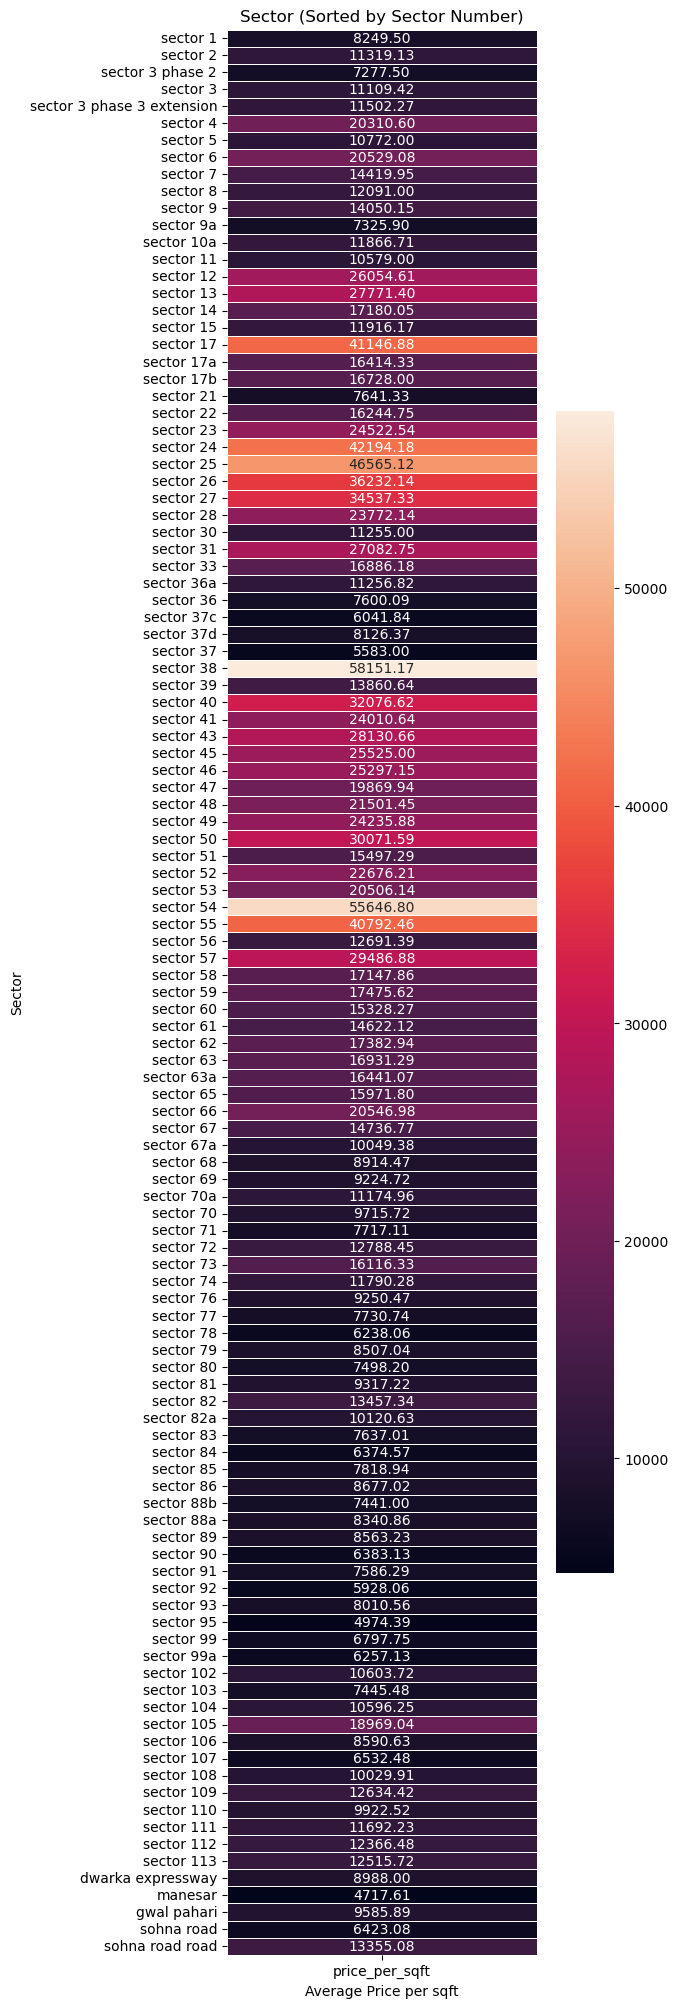

In [36]:
avg_price_per_sqft_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()

avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sqft_sector_sorted_by_sector = avg_price_per_sqft_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sqft_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

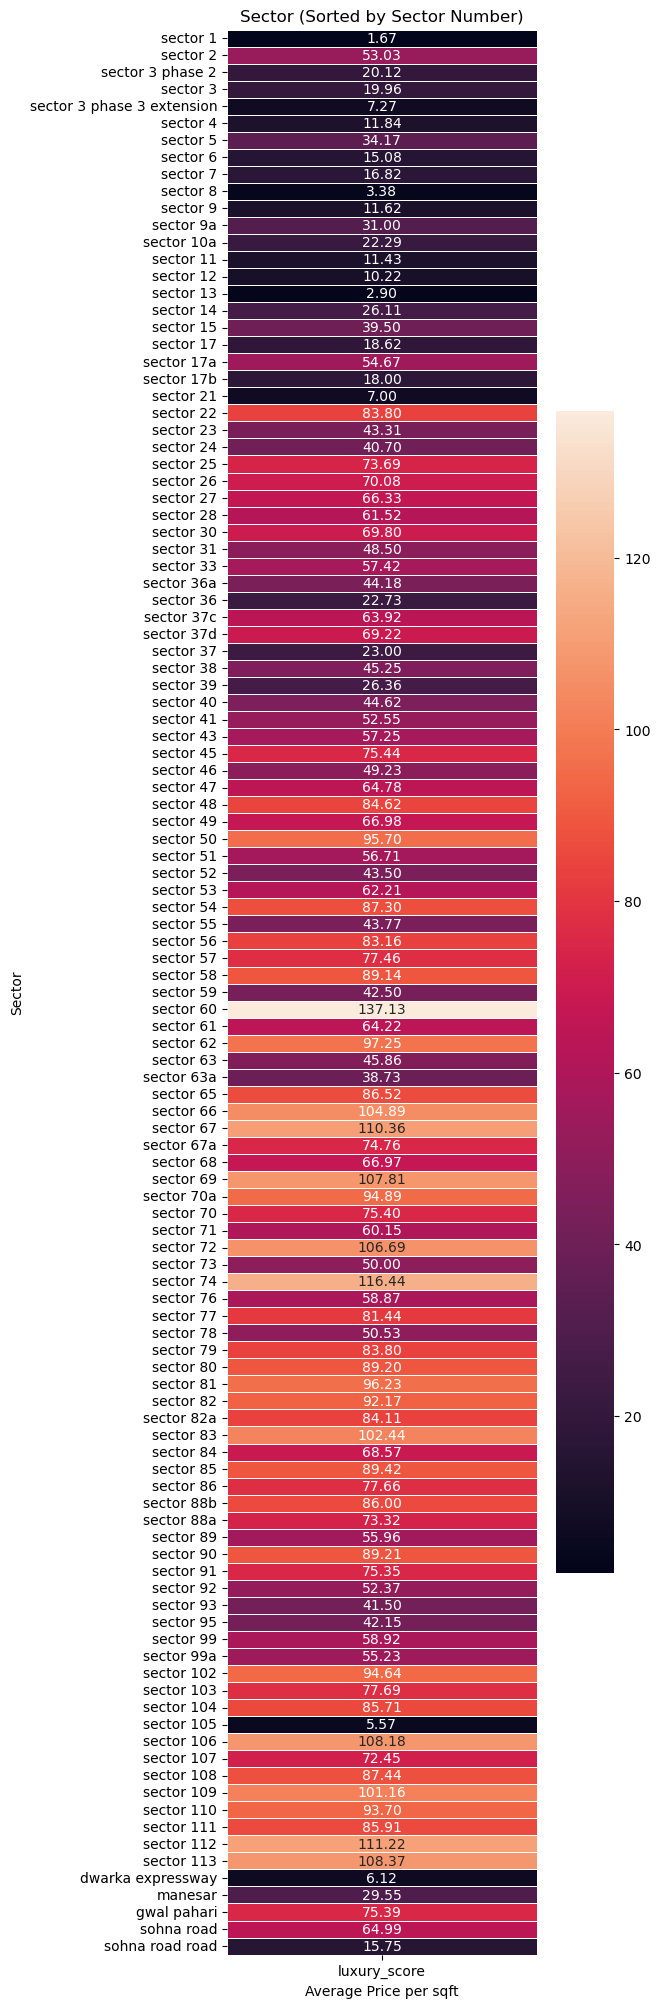

In [37]:
luxury_score = df.groupby('sector')['luxury_score'].mean().reset_index()

luxury_score['sector_number'] = luxury_score['sector'].apply(extract_sector_number)

# Sort by sector number
luxury_score_sector = luxury_score.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(luxury_score_sector.set_index('sector')[['luxury_score']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

- In new sector luxury score is higher , it means new properties providing more facilities to the consumer.



In [38]:
df.head()

property_type                   society      sector  price  price_per_sqft  \
0          flat   la vida by tata housing  sector 113   3.05         15561.0   
1          flat             m3m woodshire  sector 107   0.88          6442.0   
2         house         vatika india next   sector 82   7.00        194444.0   
3         house               independent   sector 12   1.40          8702.0   
4          flat  maxworth city residences  sector 10a   0.90          7083.0   

     area                                       areaWithType  bedRoom  \
0  1960.0  Super Built up area 2690(249.91 sq.m.)Built Up...        3   
1  1366.0             Super Built up area 1366(126.91 sq.m.)        2   
2   360.0  Plot area 360(33.45 sq.m.)Built Up area: 3900 ...        4   
3  1609.0                         Plot area 166(138.8 sq.m.)        2   
4  1271.0             Super Built up area 1200(111.48 sq.m.)        2   

   bathroom balcony  floorNum      facing   agePossession  \
0         4       3       3.0  North-West  Relatively New   
1         2      3+       3.0        East  Relatively New   
2         4      3+       3.0  North-East  Relatively New   
3         2       1       2.0  North-East    Old Property   
4         2       3       9.0        East    New Property   

   super_built_up_area  built_up_area  carpet_area  study room  servant room  \
0               2690.0         2150.0       1960.0           0             1   
1               1366.0            NaN          NaN           0             0   
2                  NaN         3900.0       3743.0           0             1   
3                  NaN          166.0          NaN           0             0   
4               1200.0            NaN          NaN           0             0   

   store room  pooja room  others  furnishing_type  luxury_score  
0           0           0       0                0           174  
1           0           0       0                0            99  
2           0           0       0                1           105  
3           0           0       0                0             0  
4           0           0       1                0            52

# price

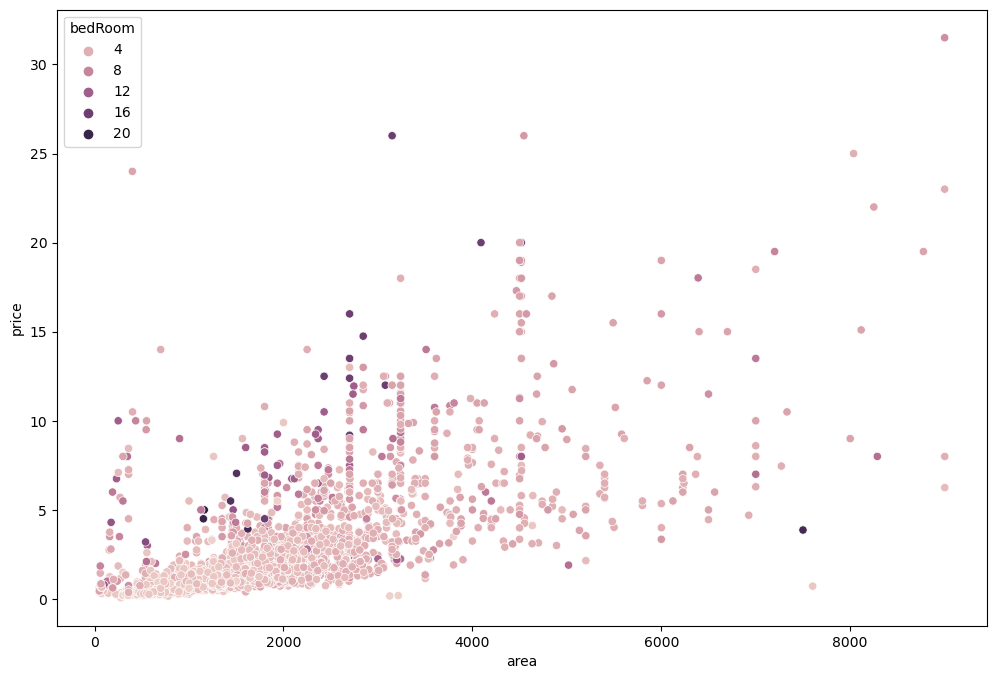

In [42]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df[df['area'] < 10000]['area'], y=df[df['area'] < 10000]['price'],hue=df['bedRoom'])
plt.show()


- In scatter plot  between "Price and area" - there is Linear relationship as area increase price also increase.
Dot colors represent bedroom size , lighter shade is less number bedroom flats.



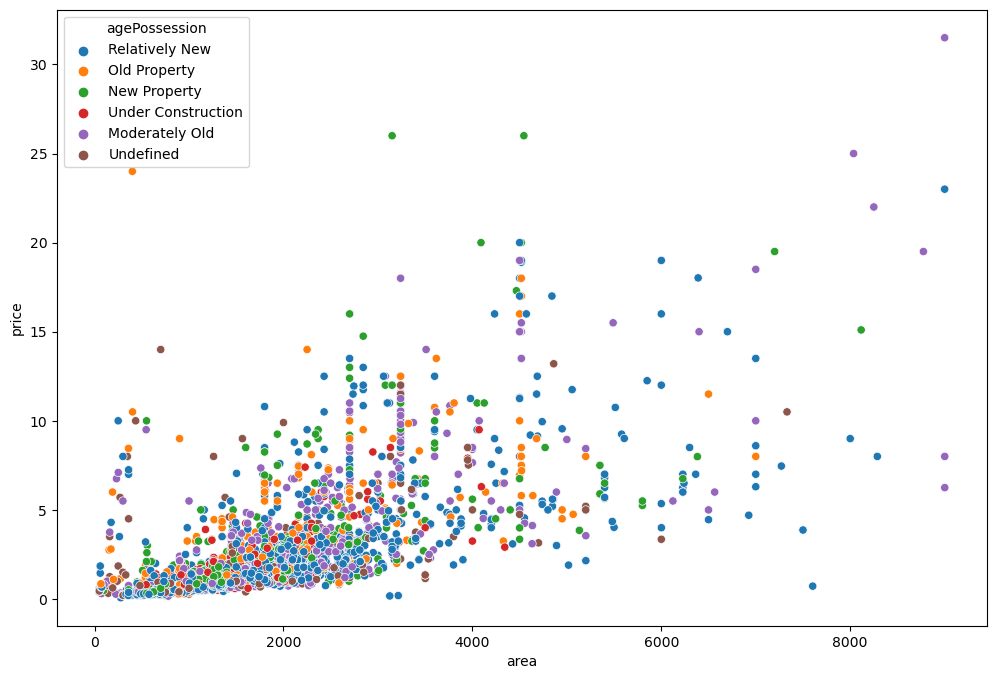

In [44]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df[df['area'] < 10000]['area'], y=df['price'],hue=df['agePossession'])
plt.show()

- Price with area and Property type : this is mix in scatterplot no clear meaning as of now.


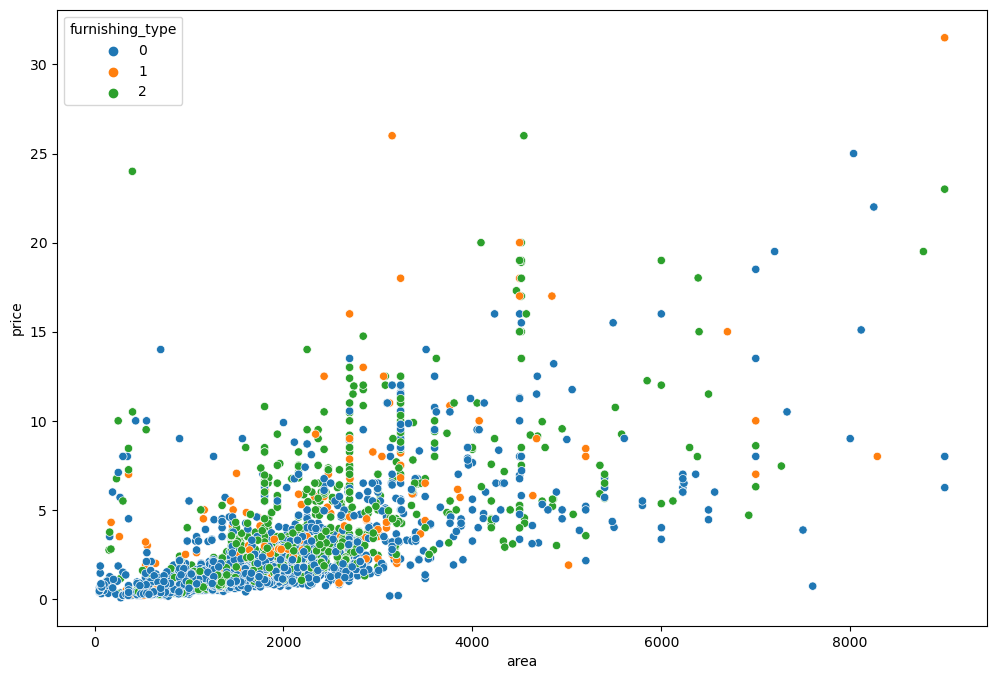

In [45]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df[df['area'] < 10000]['area'], y=df['price'],hue=df['furnishing_type'].astype('category'))
plt.show()

- Price with  area and Furnishing : here "0" is unfurnished flats which is hovering around 2000 to 3000 area sqft, 
- "1" is semi furnished flats which is between 2000 to 5000 sqft.
- And in last "2" is furnished flats which is having higher area and higher price.



/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


<Axes: xlabel='bedRoom', ylabel='price'>

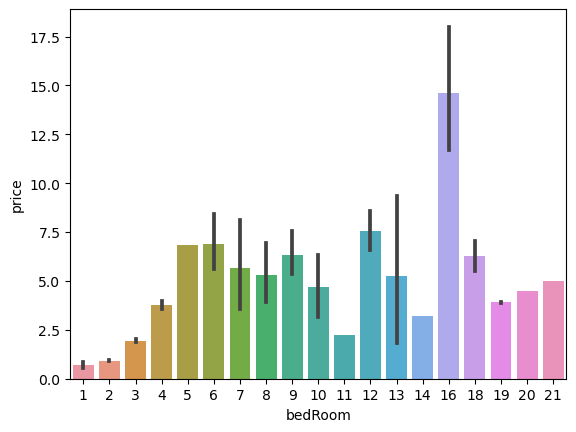

In [47]:
sns.barplot(x=df['bedRoom'],y=df['price'],estimator=np.mean)

- As bedroom increase price increase


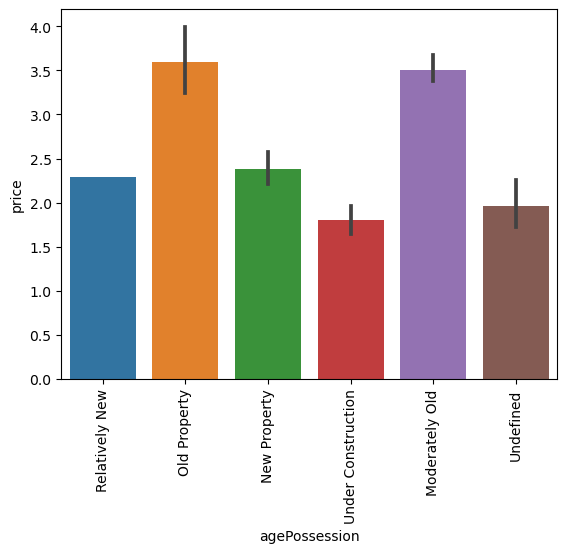

In [49]:
sns.barplot(x=df['agePossession'],y=df['price'],estimator=np.mean)
plt.xticks(rotation='vertical')
plt.show()

- Somehow old property looks costly , reason I am also figuring out. May be some vintage society


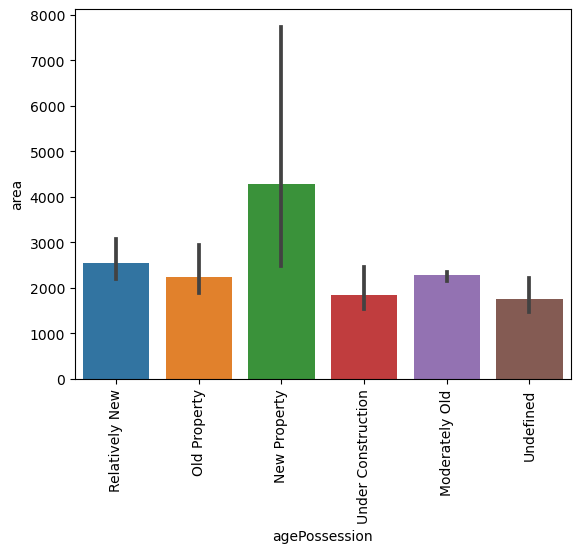

In [52]:
sns.barplot(x=df['agePossession'],y=df['area'],estimator=np.mean)
plt.xticks(rotation='vertical')
plt.show()


- Just crosscheck to see maybe due to higher area have higher price in old property but did not get such relevancy here.


/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


<Axes: xlabel='furnishing_type', ylabel='price'>

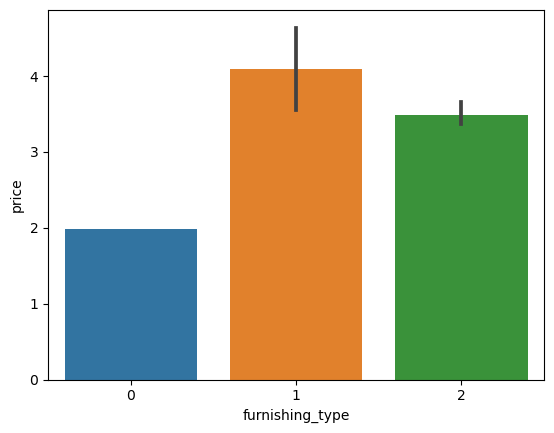

In [55]:
sns.barplot(x=df['furnishing_type'],y=df['price'],estimator=np.mean)

- Unfurnished flats approx 1.3 crore , semi furnished flats is approx 2 crore and fully furnished approx 2.3 crore


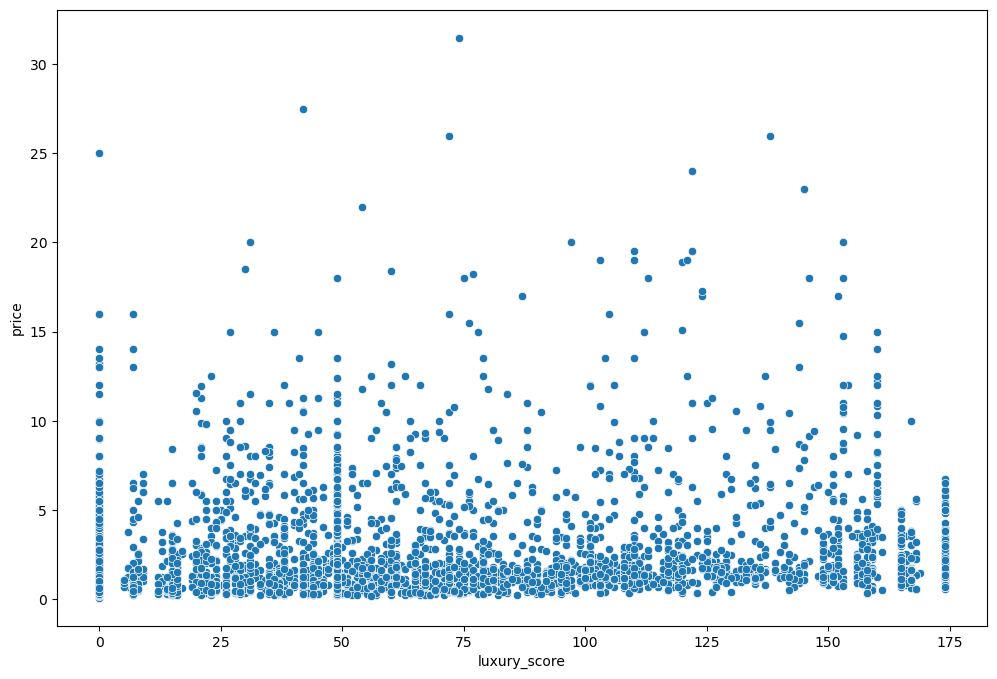

In [58]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='luxury_score', y='price', data=df)
plt.show()


- As expected from luxury score that it will show variation in price based on luxury amenities in flats , but in scatterplot not able to see any clear pattern, so can not say if luxury score increase price increase.


### correlation

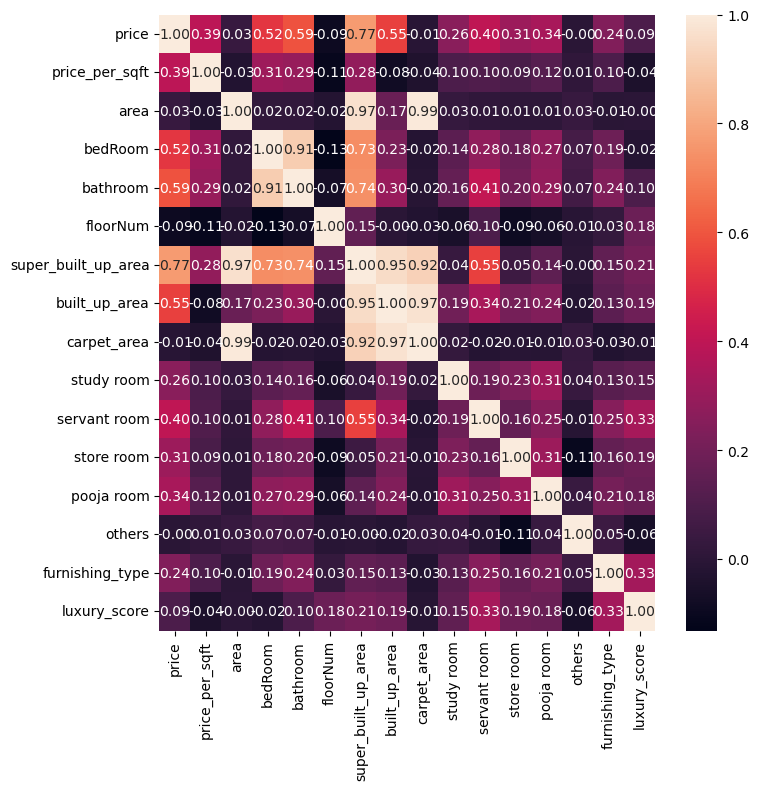

In [64]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation matrix heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(numeric_columns.corr(), annot=True,fmt=".2f" )
plt.show()

- Price and all columns correlation chart with help of heatmap to understand relationship with price.
- Also it helps to know if there any multicollinearity


In [68]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation matrix heatmap

numeric_columns.corr()['price'].sort_values(ascending=False)


price                  1.000000
super_built_up_area    0.769412
bathroom               0.589826
built_up_area          0.551649
bedRoom                0.522925
servant room           0.400927
price_per_sqft         0.391251
pooja room             0.341492
store room             0.309121
study room             0.258602
furnishing_type        0.237912
luxury_score           0.094775
area                   0.034720
others                -0.003525
carpet_area           -0.011344
floorNum              -0.094290
Name: price, dtype: float64

- Check price column correlation with others and found : it is mostly depend upon built up area, bedroom , bathroom size , floor number , luxury score not helping in price increase ad much.


In [69]:
df.head()

property_type                   society      sector  price  price_per_sqft  \
0          flat   la vida by tata housing  sector 113   3.05         15561.0   
1          flat             m3m woodshire  sector 107   0.88          6442.0   
2         house         vatika india next   sector 82   7.00        194444.0   
3         house               independent   sector 12   1.40          8702.0   
4          flat  maxworth city residences  sector 10a   0.90          7083.0   

     area                                       areaWithType  bedRoom  \
0  1960.0  Super Built up area 2690(249.91 sq.m.)Built Up...        3   
1  1366.0             Super Built up area 1366(126.91 sq.m.)        2   
2   360.0  Plot area 360(33.45 sq.m.)Built Up area: 3900 ...        4   
3  1609.0                         Plot area 166(138.8 sq.m.)        2   
4  1271.0             Super Built up area 1200(111.48 sq.m.)        2   

   bathroom balcony  floorNum      facing   agePossession  \
0         4       3       3.0  North-West  Relatively New   
1         2      3+       3.0        East  Relatively New   
2         4      3+       3.0  North-East  Relatively New   
3         2       1       2.0  North-East    Old Property   
4         2       3       9.0        East    New Property   

   super_built_up_area  built_up_area  carpet_area  study room  servant room  \
0               2690.0         2150.0       1960.0           0             1   
1               1366.0            NaN          NaN           0             0   
2                  NaN         3900.0       3743.0           0             1   
3                  NaN          166.0          NaN           0             0   
4               1200.0            NaN          NaN           0             0   

   store room  pooja room  others  furnishing_type  luxury_score  
0           0           0       0                0           174  
1           0           0       0                0            99  
2           0           0       0                1           105  
3           0           0       0                0             0  
4           0           0       1                0            52

/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

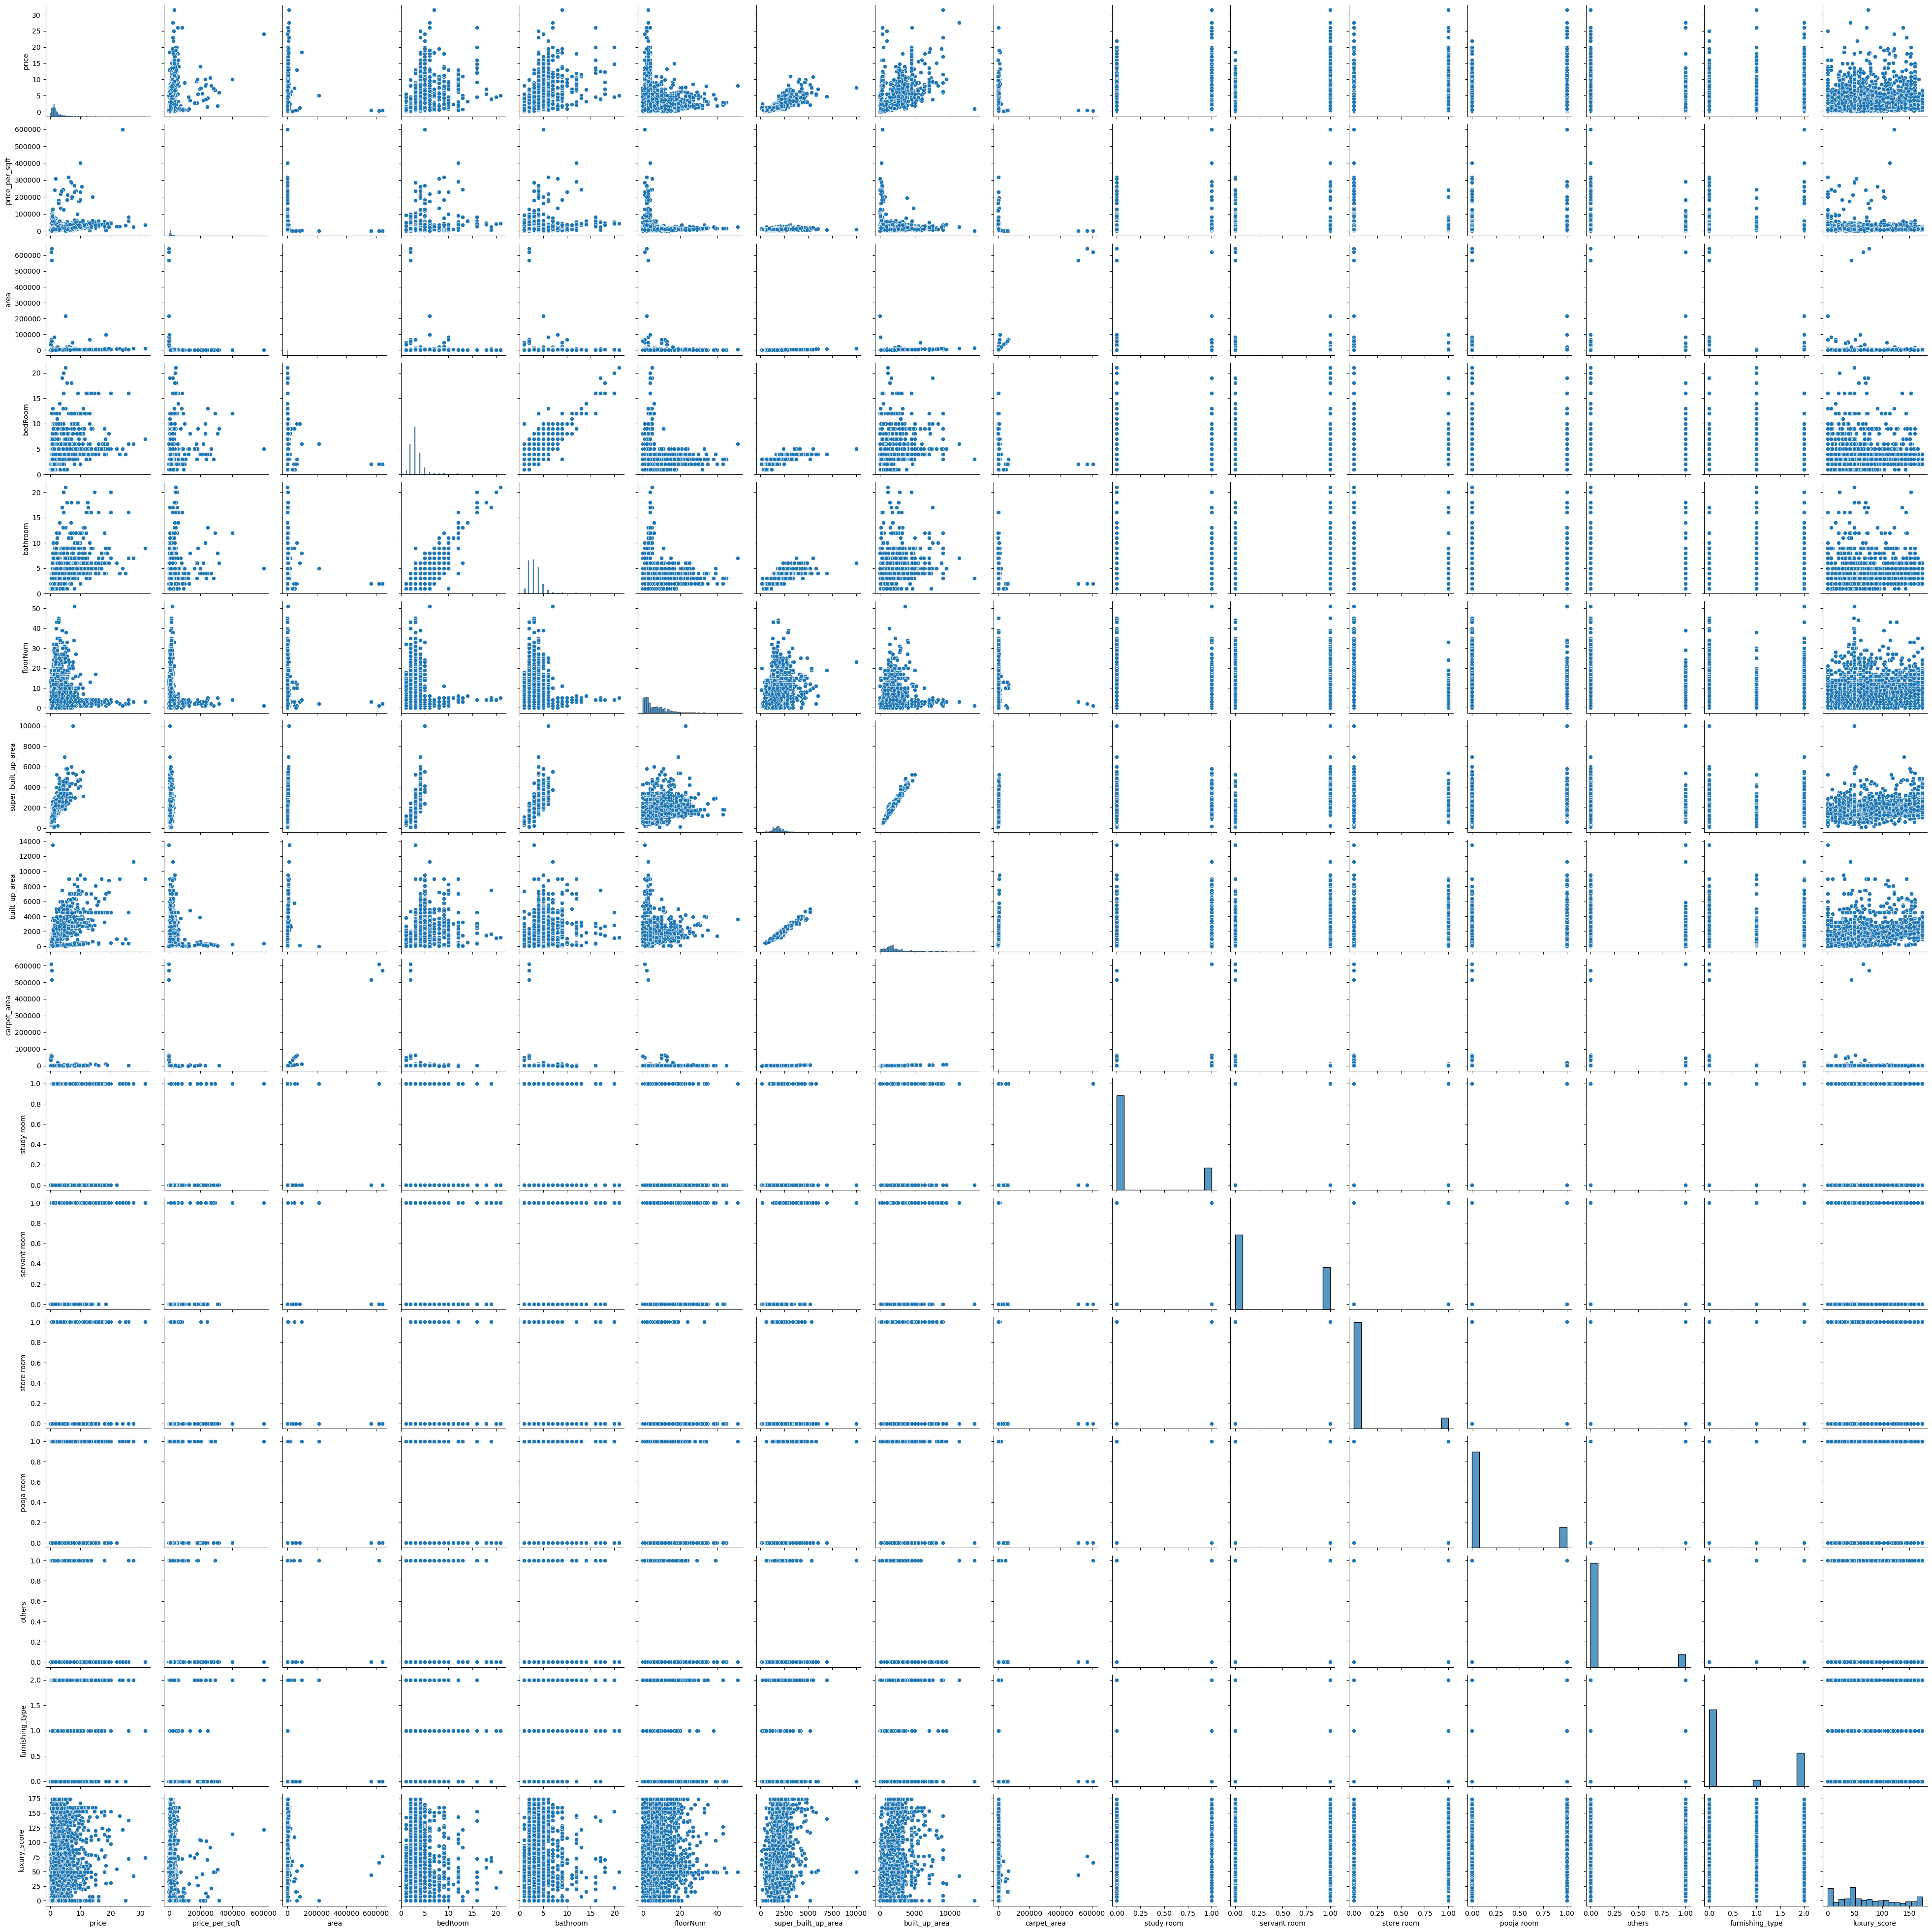

In [70]:
sns.pairplot(df)